In [1]:
# Base library imports
import colorsys
import os
import re

# Module imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Quick pathfix required before loading project resources
try:
    notebook_location
except NameError:
    notebook_location = os.getcwd()
    os.chdir(re.sub(r'(DSC672)[\\/].*', r'\1', notebook_location))

# Project imports (none just yet)

In [2]:
def display_full_df(df):
    """
    Utility function to display a data frame in full
    """
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(df)


def create_hist_agg(prefix, bins):
    """
    Utility function to aggregate histogram data
    """
    result = dict()
    for i in range(bins):
        result['%s%s' % (prefix, i)] = 'sum'
    return result


def create_hue_colors(bins, s=1., v=1.):
    """
    Utility function to create a list of colors in the HSV space stepping the H value
    from zero to one given the number of bins, S-value, and V-value.
    """
    colors = list()
    for i in range(bins):
        rgb_float = colorsys.hsv_to_rgb(float(i * 8)/255., s, v)
        rgb = [0, 0, 0]
        rgb[0] = int(rgb_float[0]*255)
        rgb[1] = int(rgb_float[1]*255)
        rgb[2] = int(rgb_float[2]*255)
        colors.append('#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2]))
    return colors

## Quick Preview of the Training and Testing Data Summaries

In [3]:
data_summary_df = pd.read_csv('temp_data/contest_image_aggregation.csv')
display(data_summary_df)

,tile_id,catalog,size,collection,map,tile,x,y,zoom,map_pixels,...,v23,v24,v25,v26,v27,v28,v29,v30,v31,building_pixels
0,tier1_lg_znz_076995_903,tier1_lg,256,znz,076995,903,638935,541295,20,65536,...,4109,1718,539,123,17,1,0,0,0,0
1,tier1_lg_znz_3f8360_3972,tier1_lg,256,znz,3f8360,3972,638928,541576,20,65536,...,728,883,1057,1778,2985,7118,11474,6,0,12929
2,tier1_lg_acc_d41d81_9,tier1_lg,256,acc,d41d81,9,523690,507973,20,31021,...,929,775,506,430,218,103,112,291,503,8684
3,tier1_znz_75cdfa_1167,tier1,256,znz,75cdfa,1167,319417,270708,19,65536,...,485,322,183,58,36,24,22,28,0,0
4,tier1_lg_znz_75cdfa_1588,tier1_lg,256,znz,75cdfa,1588,638865,541380,20,65536,...,2,3,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,tier1_lg_znz_c7415c_4288,tier1_lg,256,znz,c7415c,4288,638930,541514,20,65536,...,1935,568,47,0,0,0,0,0,0,0
39996,tier1_lg_dar_0a4c40_5916,tier1_lg,256,dar,0a4c40,5916,638694,544228,20,65536,...,829,1226,677,24,16,0,0,0,0,15239
39997,tier1_lg_acc_ca041a_846,tier1_lg,256,acc,ca041a,846,523646,507953,20,65536,...,1178,781,556,711,1137,296,96,44,0,25945
39998,tier1_lg_mon_f15272_213,tier1_lg,256,mon,f15272,213,492829,505823,20,43923,...,468,310,222,379,214,161,100,39,118,25354


In [4]:
test_data_summary_df = pd.read_csv('temp_data/test_summary.csv')
display(test_data_summary_df)

,tile_id,map,map_pixels,r0,r1,r2,r3,r4,r5,r6,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,00022f,00022f,65536,0,0,0,3,0,10,49,...,6991,5603,4617,3991,3594,3214,2654,1224,110,2
1,0002cd,0002cd,65536,0,6,162,1274,2102,2134,1594,...,2122,1935,2821,8594,9849,9469,6709,1330,97,1
2,0008b6,0008b6,65536,0,0,0,0,0,0,0,...,8145,6162,2925,873,210,120,55,29,0,0
3,000e6e,000e6e,65536,0,0,3,404,233,193,181,...,4625,4110,3012,1897,1123,1150,3278,2987,1503,6
4,0020ad,0020ad,65536,0,0,0,0,0,5,220,...,1167,257,96,49,18,6,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,ffd0bc,ffd0bc,65536,0,0,111,1056,1795,1643,1520,...,5106,2157,1668,1045,701,695,597,323,266,40
11477,ffe6d2,ffe6d2,65536,0,0,0,0,1,55,833,...,4429,1683,266,5,1,0,0,0,0,0
11478,fff282,fff282,65536,0,0,0,0,0,0,1,...,288,31,3,0,0,0,0,0,0,0
11479,fffd3f,fffd3f,65536,0,0,61,2331,3940,3661,2972,...,2708,1246,918,771,499,317,383,334,428,50


# Building and Map Pixels: Percentage Building Coverage
The first portion of the exploratory analysis focuses on the percentage of pixels in the training data that are classified as buildings.

## Building and Map Pixels Broken Down by Map

In [5]:
map_summary_df = data_summary_df.groupby(['catalog', 'collection', 'map']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
map_summary_df['percent_building'] = map_summary_df['building_pixels']['sum'].astype(float) / \
    map_summary_df['map_pixels']['sum'].astype(float)
display_full_df(map_summary_df)

tile map_pixels building_pixels percent_building
                           count        sum             sum                 
catalog  collection map                                                     
tier1    acc        665946   151    8311912         2370879         0.285239
                    a42435   100    5661614         2169561         0.383205
                    ca041a   149    8505762         2963587         0.348421
                    d41d81   143    7999904         3760712         0.470095
         dar        0a4c40   570   34708149         6699763         0.193031
                    353093   242   13770930         3065409         0.222600
                    a017f9   215   12678496         3431809         0.270680
                    b15fce   252   15494482         7373685         0.475891
         kam        4e7c7f    75    4160652          771949         0.185536
         mon        207cc7    29    1447525          466449         0.322239
                    401175    50    2411443          850781         0.352810
                    493701    39    2016862          529190         0.262383
                    f15272    28    1477020          812777         0.550282
         nia        825a50    58    2812237          135481         0.048176
         ptn        abe1a3    90    5071038         1594652         0.314463
                    f49f31    33    1673280          627244         0.374859
         znz        06f252   594   36537123          454960         0.012452
                    076995   456   29208907          325816         0.011155
                    33cae6   436   27110958         2474292         0.091265
                    3f8360   534   33496109          912105         0.027230
                    425403   555   34771730           58809         0.001691
                    75cdfa   593   36317909          167155         0.004603
                    9b8638   432   26811691          610689         0.022777
                    aee7fd   571   35127566          182593         0.005198
                    bc32f1   540   33904006           10897         0.000321
                    bd5c14   567   36474974          476969         0.013077
                    c7415c   411   25709728          494124         0.019219
                    e52478   247   15380293           11131         0.000724
tier1_lg acc        665946   605   36725442        10239638         0.278816
                    a42435   370   22604329         8938556         0.395436
                    ca041a   555   33627524        11202659         0.333140
                    d41d81   543   33031075        15018554         0.454680
         dar        0a4c40  2172  137718990        25408814         0.184498
                    353093   907   56087685        12913026         0.230229
                    a017f9   756   46502828        13113928         0.282003
                    b15fce   935   58711019        28024935         0.477337
         kam        4e7c7f   292   17080270         2946624         0.172516
         mon        207cc7   107    5951874         2205429         0.370544
                    401175   169    9699365         3551405         0.366148
                    493701   159    9067571         2278391         0.251268
                    f15272    87    4811385         2685288         0.558111
         nia        825a50   196   11354446          477237         0.042031
         ptn        abe1a3   344   20750532         6006432         0.289459
                    f49f31   151    8534894         3157818         0.369989
         znz        06f252  2195  140917847         1728564         0.012266
                    076995  1857  119922484         1452500         0.012112
                    33cae6  1789  114193694        11365271         0.099526
                    3f8360  1967  124661139         3194366         0.025624
                    425403  2259  145345123          221161         0.001522
                    75cd

## Building and Map Pixels Broken Down by Collection

In [6]:
collection_summary_df = data_summary_df.groupby(['catalog', 'collection']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
collection_summary_df['percent_building'] = collection_summary_df['building_pixels']['sum'].astype(float) / \
    collection_summary_df['map_pixels']['sum'].astype(float)
display_full_df(collection_summary_df)

tile  map_pixels building_pixels percent_building
                     count         sum             sum                 
catalog  collection                                                    
tier1    acc           543    30479192        11264739         0.369588
         dar          1279    76652057        20570666         0.268364
         kam            75     4160652          771949         0.185536
         mon           146     7352850         2659197         0.361655
         nia            58     2812237          135481         0.048176
         ptn           123     6744318         2221896         0.329447
         znz          5936   370850994         6179540         0.016663
tier1_lg acc          2073   125988370        45399407         0.360346
         dar          4770   299020522        79460703         0.265737
         kam           292    17080270         2946624         0.172516
         mon           522    29530195        10720513         0.363036
         nia           196    11354446          477237         0.042031
         ptn           495    29285426         9164250         0.312929
         znz         23492  1500278291        25515714         0.017007

## Building and Map Pixels Broken Down by Catalog

In [7]:
catalog_summary_df = data_summary_df.groupby(['catalog']).agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
catalog_summary_df['percent_building'] = catalog_summary_df['building_pixels']['sum'].astype(float) / \
    catalog_summary_df['map_pixels']['sum'].astype(float)
display_full_df(catalog_summary_df)

,tile,map_pixels,building_pixels,percent_building
,count,sum,sum,
catalog,,,,
tier1,8160,499052300,43803468,0.087773
tier1_lg,31840,2012537520,173684448,0.086301


## Building and Map Pixels For Entire Training Data Set

In [8]:
train_summary_df = data_summary_df.agg({
    'tile': ['count'],
    'map_pixels': ['sum'],
    'building_pixels': ['sum']
})
train_summary_df['percent_building'] = train_summary_df['building_pixels']['sum'].astype(float) / \
    train_summary_df['map_pixels']['sum'].astype(float)
display(train_summary_df)

,tile,map_pixels,building_pixels,percent_building
count,40000.0,NaN,NaN,0.086594
sum,NaN,2.511590e+09,217487916.0,0.086594


# Pixel Color-Component Analysis

In [9]:
tier_r_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('r', 32))
tier_g_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('g', 32))
tier_b_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('b', 32))
tier_h_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('h', 32))
tier_s_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('s', 32))
tier_v_histogram = data_summary_df.groupby(['catalog']).agg(create_hist_agg('v', 32))

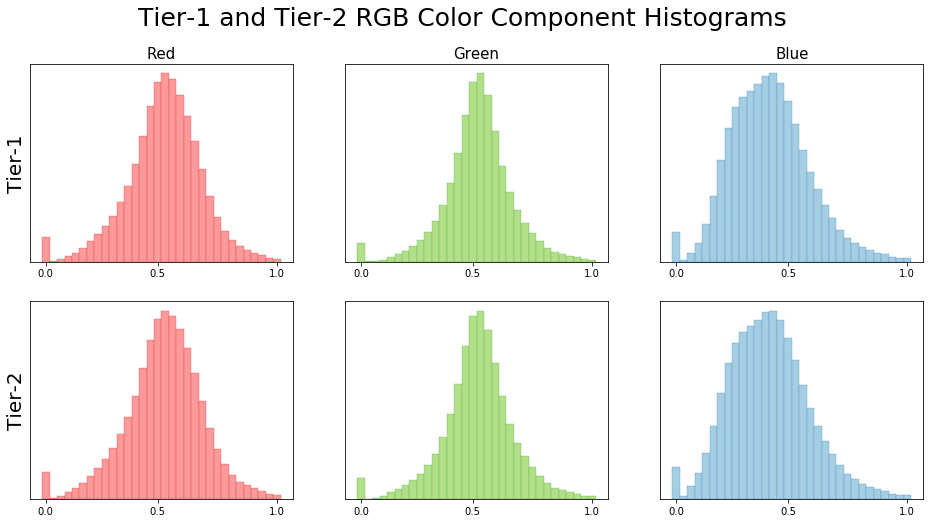

In [10]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[0].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[0].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[0].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_r_histogram.iloc[1].values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_g_histogram.iloc[1].values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_b_histogram.iloc[1].values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 RGB Color Component Histograms', fontsize=25)
plt.show()

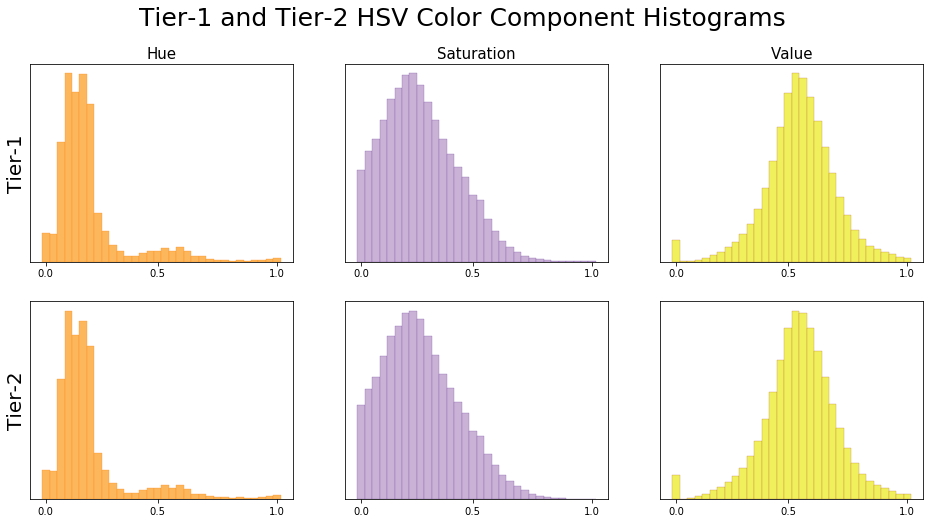

In [11]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[0].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[0].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=tier_s_histogram.iloc[1].values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=tier_v_histogram.iloc[1].values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Color Component Histograms', fontsize=25)
plt.show()

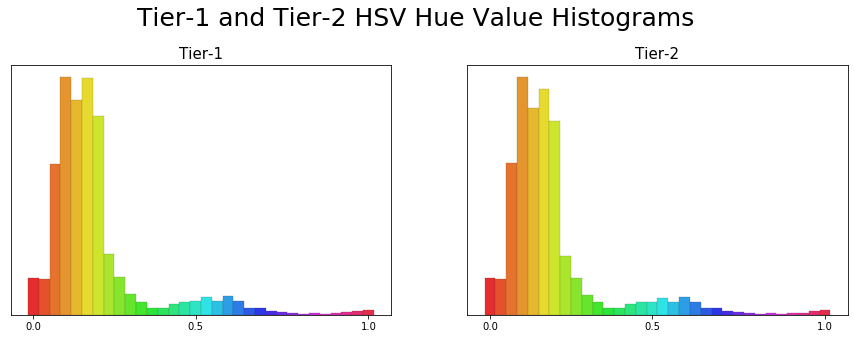

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Tier-1', fontsize=15)
axs[0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Tier-2', fontsize=15)
axs[1].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Tier-1 and Tier-2 HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

In [13]:
train_r_histogram = data_summary_df.agg(create_hist_agg('r', 32))
train_g_histogram = data_summary_df.agg(create_hist_agg('g', 32))
train_b_histogram = data_summary_df.agg(create_hist_agg('b', 32))
train_h_histogram = data_summary_df.agg(create_hist_agg('h', 32))
train_s_histogram = data_summary_df.agg(create_hist_agg('s', 32))
train_v_histogram = data_summary_df.agg(create_hist_agg('v', 32))

In [14]:
test_r_histogram = test_data_summary_df.agg(create_hist_agg('r', 32))
test_g_histogram = test_data_summary_df.agg(create_hist_agg('g', 32))
test_b_histogram = test_data_summary_df.agg(create_hist_agg('b', 32))
test_h_histogram = test_data_summary_df.agg(create_hist_agg('h', 32))
test_s_histogram = test_data_summary_df.agg(create_hist_agg('s', 32))
test_v_histogram = test_data_summary_df.agg(create_hist_agg('v', 32))

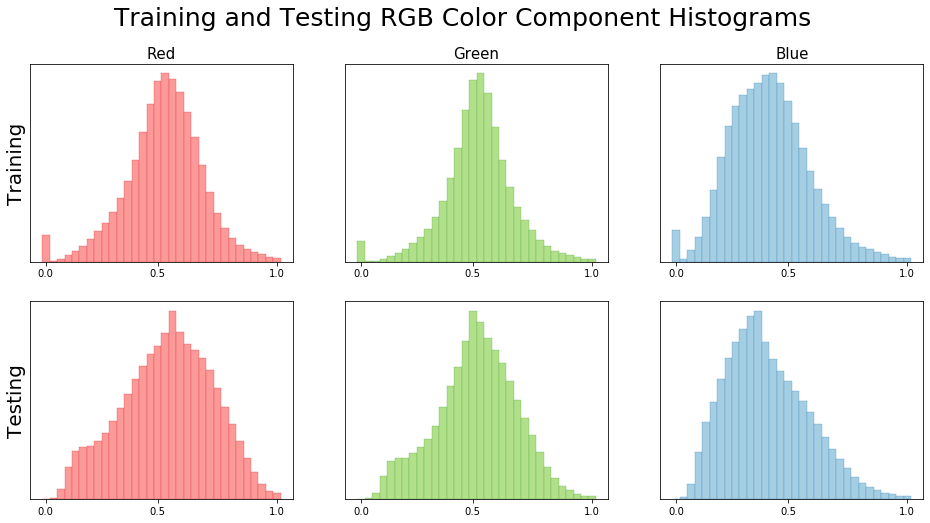

In [15]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Red', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[0, 1].set_title('Green', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[0, 2].set_title('Blue', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_r_histogram.values, width=1.,
              color='#fb9a99', edgecolor='#e31a1c', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_g_histogram.values, width=1.,
              color='#b2df8a', edgecolor='#33a02c', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_b_histogram.values, width=1.,
              color='#a6cee3', edgecolor='#1f78b4', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing RGB Color Component Histograms', fontsize=25)
plt.show()

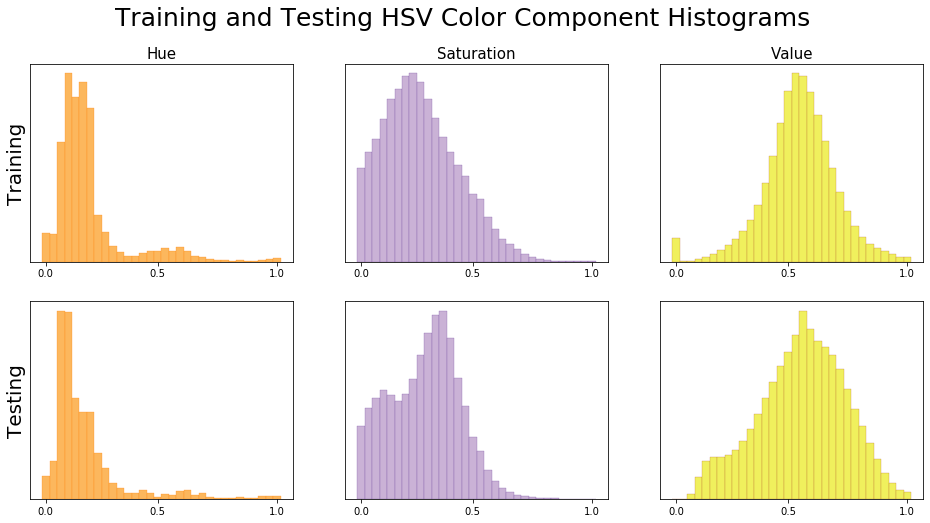

In [16]:
fig, axs = plt.subplots(2,3, figsize=(16,8))
axs[0, 0].set_ylabel('Training', fontsize=20)
axs[0, 0].set_title('Hue', fontsize=15)
axs[0, 0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[0, 1].set_title('Saturation', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=train_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[0, 2].set_title('Value', fontsize=15)
axs[0, 2].bar(x=range(0,32), height=train_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
axs[1, 0].set_ylabel('Testing', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color='#fcb75d', edgecolor='#ff7f00', linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_s_histogram.values, width=1.,
              color='#cab2d6', edgecolor='#6a3d9a', linewidth=0.25)
axs[1, 2].bar(x=range(0,32), height=test_v_histogram.values, width=1.,
              color='#f0f05d', edgecolor='#b15928', linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Testing HSV Color Component Histograms', fontsize=25)
plt.show()

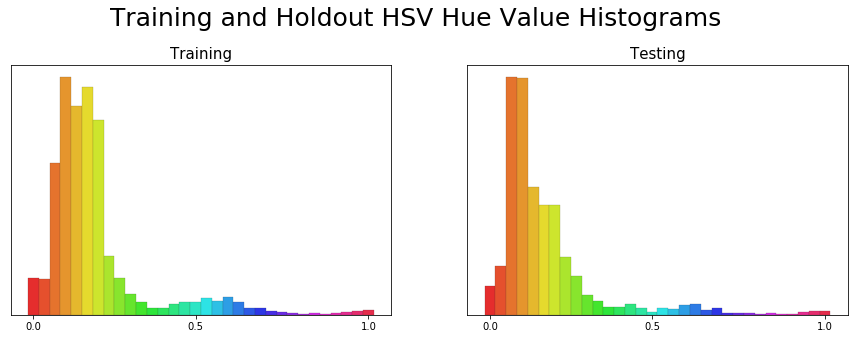

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title('Training', fontsize=15)
axs[0].bar(x=range(0,32), height=train_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1].set_title('Testing', fontsize=15)
axs[1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training and Holdout HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.82)
plt.show()

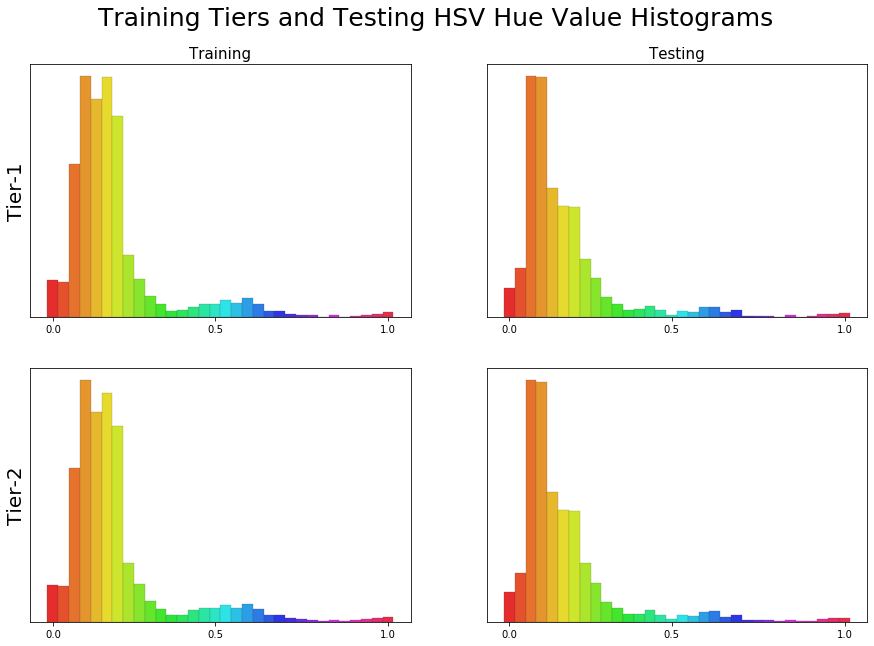

In [18]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs[0, 0].set_title('Training', fontsize=15)
axs[0, 0].set_ylabel('Tier-1', fontsize=20)
axs[0, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[0].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[0, 1].set_title('Testing', fontsize=15)
axs[0, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 0].set_ylabel('Tier-2', fontsize=20)
axs[1, 0].bar(x=range(0,32), height=tier_h_histogram.iloc[1].values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
axs[1, 1].bar(x=range(0,32), height=test_h_histogram.values, width=1.,
              color=create_hue_colors(32, 0.8, 0.9), edgecolor=create_hue_colors(32, 0.66, 0.5), linewidth=0.25)
plt.setp(axs, yticks=[], xticks=[0, 15, 31], xticklabels=['0.0', '0.5', '1.0'])
fig.suptitle('Training Tiers and Testing HSV Hue Value Histograms', fontsize=25)
plt.subplots_adjust(top=.90)
plt.show()